In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("train.csv")
df.shape

(404290, 6)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
140238,140238,211036,10515,How can I enable fullscreen mode in Microsoft ...,How do I install Microsoft Edge on Windows 7?,0
218977,218977,325731,165750,What is the difference between a girl's ass an...,Do most women have a list of men they slept with?,0
11605,11605,22400,22401,What is the salary of a web designer (fresher)...,What is the average salary of a web designer i...,1
386913,386913,41862,519184,If you are a Chinese citizen of the HKSAR and ...,If you are a Chinese citizen of the HKSAR and ...,0
378936,378936,510407,510408,Which state in India receives abundant rainfall?,"Did Tamil Nadu, India, receive more rainfall i...",0
305563,305563,428983,428984,What is the one thing that Indians are crazy a...,What are Indians crazy about?,1
172569,172569,266411,210318,Marvel Cinematic Universe: What's the differen...,How different would our world be if we actuall...,0
223394,223394,34432,106875,"If you could choose any superpower, what super...",What would your superpower be and why?,1
283462,283462,191086,258335,"I’m in high school, how can I stop wasting my ...",How can I make better use of my time?,0
92506,92506,12726,1449,What is the meaning or purpose of life?,What is the exact meaning of life?,1


In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.is_duplicate.value_counts()

0    255027
1    149263
Name: is_duplicate, dtype: int64

<Axes: >

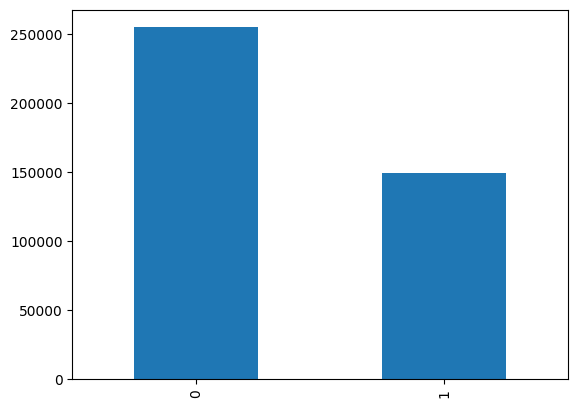

In [ ]:
df.is_duplicate.value_counts().plot(kind='bar')

In [ ]:
qid = pd.Series (df['qid1'].tolist() + df['qid2'].tolist())
print('Number of unique questions', np.unique(qid).shape[0])

x = qid.value_counts()>1
print('Number of questions getting repeated', x[x].shape[0])

Number of unique questions 537933
Number of questions getting repeated 111780


In [ ]:
new_df = df.sample(30000)

In [ ]:
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
q_df = new_df[['question1','question2']]
q_df.head()

,question1,question2
168667,"If the black money gets accounted in banks, is...",Feature in Multimedia?
93717,What are the pulses challenges and prospects o...,What are the prospects for pulses for sustaina...
81638,Is this move of banning 500 & 1000 Rupee notes...,What do you think of the decision by the India...
87892,How can I learn German online?,How can I learn German by reading?
312681,Why do people hate anime?,Why do people hate anime so much?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

questions = list(q_df['question1']) + list(q_df['question2'])

cv = CountVectorizer(max_features = 3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1 = pd.DataFrame(q1_arr, index = q_df.index)
temp_df2 = pd.DataFrame(q2_arr, index = q_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis = 1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df['is_duplicate'] = new_df['is_duplicate']

In [ ]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
168667,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
93717,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
81638,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
87892,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
temp_df.shape

(30000, 6001)

In [ ]:
from sklearn.model_selection import train_test_split
xtr, xt, ytr, yt = train_test_split(temp_df.iloc[:,0:-1], temp_df.iloc[:,-1])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(xtr, ytr)
y_pred = rf.predict(xt)
accuracy_score(yt, y_pred)

0.7284